In [111]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import poisson
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels as st
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from tabulate import tabulate
import pmdarima as pm
from dateutil.relativedelta import relativedelta
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [112]:
df = pd.read_csv('Datos_preprocesados_accidentes_y_victimas_accidentes.csv')

In [113]:
db_provincia34 = df[df['COD_PROVINCIA'] == 34]

In [114]:
num_victimas_dia_semana34 = db_provincia34.groupby(['ANYO', 'MES', 'DIA_SEMANA'])['TOTAL_VICTIMAS_24H'].sum()

In [115]:
num_victimas_dia_semana34 = num_victimas_dia_semana34.reset_index()

In [116]:
num_victimas_dia_semana34['FECHA'] = num_victimas_dia_semana34.apply(lambda row: str(row['ANYO']) + '/' + str(row['MES']) + '/' + str(row['DIA_SEMANA']), axis = 1)

In [117]:
num_accidentes_por_dia_semana34 = db_provincia34.groupby(['ANYO', 'MES'])['DIA_SEMANA'].value_counts()

In [118]:
num_accidentes_por_dia_semana34

ANYO  MES  DIA_SEMANA
2016  1    4             3
           1             2
           2             2
           3             2
           5             2
                        ..
2020  12   3             2
           4             2
           1             1
           6             1
           7             1
Name: count, Length: 364, dtype: int64

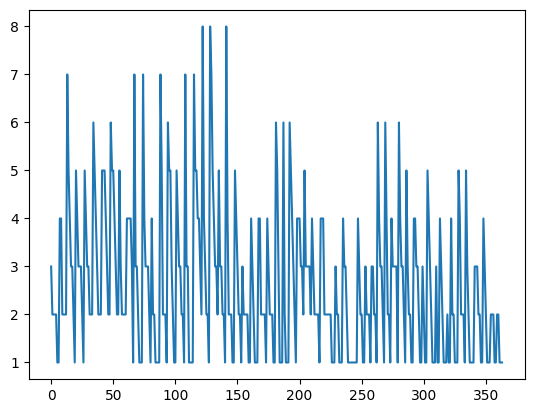

In [119]:
plt.plot(num_accidentes_por_dia_semana34.values)

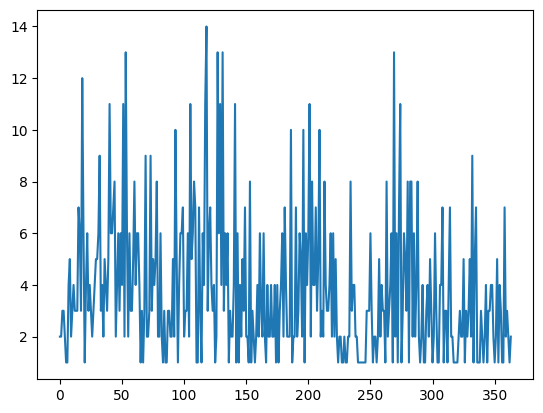

In [120]:
plt.plot(num_victimas_dia_semana34['TOTAL_VICTIMAS_24H'])

In [121]:
num_accidentes_por_dia_semana34 = num_accidentes_por_dia_semana34.reset_index()

In [122]:
num_accidentes_por_dia_semana34['FECHA'] = num_accidentes_por_dia_semana34.apply(lambda row: str(row['ANYO']) + '/' + str(row['MES']) + '/' + str(row['DIA_SEMANA']), axis = 1)

In [123]:
num_accidentes_por_dia_semana34

,ANYO,MES,DIA_SEMANA,count,FECHA
0,2016,1,4,3,2016/1/4
1,2016,1,1,2,2016/1/1
2,2016,1,2,2,2016/1/2
3,2016,1,3,2,2016/1/3
4,2016,1,5,2,2016/1/5
...,...,...,...,...,...
359,2020,12,3,2,2020/12/3
360,2020,12,4,2,2020/12/4
361,2020,12,1,1,2020/12/1
362,2020,12,6,1,2020/12/6


In [124]:
num_victimas_dia_semana34 = num_victimas_dia_semana34.reset_index()

In [125]:
num_victimas_dia_semana34

,index,ANYO,MES,DIA_SEMANA,TOTAL_VICTIMAS_24H,FECHA
0,0,2016,1,1,2,2016/1/1
1,1,2016,1,2,2,2016/1/2
2,2,2016,1,3,3,2016/1/3
3,3,2016,1,4,3,2016/1/4
4,4,2016,1,5,2,2016/1/5
...,...,...,...,...,...,...
359,359,2020,12,1,2,2020/12/1
360,360,2020,12,3,3,2020/12/3
361,361,2020,12,4,2,2020/12/4
362,362,2020,12,6,1,2020/12/6


In [126]:
num_victimas_dia_semana34['FECHA'] = num_victimas_dia_semana34.apply(lambda row: str(row['ANYO']) + '/' + str(row['MES']) + '/' + str(row['DIA_SEMANA']), axis = 1)

In [127]:
num_victimas_dia_semana34

,index,ANYO,MES,DIA_SEMANA,TOTAL_VICTIMAS_24H,FECHA
0,0,2016,1,1,2,2016/1/1
1,1,2016,1,2,2,2016/1/2
2,2,2016,1,3,3,2016/1/3
3,3,2016,1,4,3,2016/1/4
4,4,2016,1,5,2,2016/1/5
...,...,...,...,...,...,...
359,359,2020,12,1,2,2020/12/1
360,360,2020,12,3,3,2020/12/3
361,361,2020,12,4,2,2020/12/4
362,362,2020,12,6,1,2020/12/6


In [128]:
num_accidentes_por_dia_semana34

,ANYO,MES,DIA_SEMANA,count,FECHA
0,2016,1,4,3,2016/1/4
1,2016,1,1,2,2016/1/1
2,2016,1,2,2,2016/1/2
3,2016,1,3,2,2016/1/3
4,2016,1,5,2,2016/1/5
...,...,...,...,...,...
359,2020,12,3,2,2020/12/3
360,2020,12,4,2,2020/12/4
361,2020,12,1,1,2020/12/1
362,2020,12,6,1,2020/12/6


In [129]:
num_victimas_dia_semana34

,index,ANYO,MES,DIA_SEMANA,TOTAL_VICTIMAS_24H,FECHA
0,0,2016,1,1,2,2016/1/1
1,1,2016,1,2,2,2016/1/2
2,2,2016,1,3,3,2016/1/3
3,3,2016,1,4,3,2016/1/4
4,4,2016,1,5,2,2016/1/5
...,...,...,...,...,...,...
359,359,2020,12,1,2,2020/12/1
360,360,2020,12,3,3,2020/12/3
361,361,2020,12,4,2,2020/12/4
362,362,2020,12,6,1,2020/12/6


In [130]:
df_provincia34 = num_accidentes_por_dia_semana34.merge(num_victimas_dia_semana34, on = 'FECHA')

In [131]:
df_provincia34 = df_provincia34[['ANYO_x', 'FECHA', 'count', 'TOTAL_VICTIMAS_24H']]

In [132]:
df_provincia34.describe()

,ANYO_x,count,TOTAL_VICTIMAS_24H
count,364.000000,364.000000,364.000000
mean,2017.857143,2.631868,3.788462
std,1.397135,1.545161,2.680771
min,2016.000000,1.000000,1.000000
25%,2017.000000,1.000000,2.000000
50%,2018.000000,2.000000,3.000000
75%,2019.000000,3.250000,5.000000
max,2020.000000,8.000000,14.000000


# PREDICCION DE NÚMERO DE ACCIDENTES

### MODELO PROPHET

In [133]:
df_provincia34['y'] = df_provincia34['count']
df_provincia34['ds'] = pd.to_datetime(pd.to_datetime(df_provincia34['FECHA']).dt.date)

20:57:34 - cmdstanpy - INFO - Chain [1] start processing
20:57:34 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


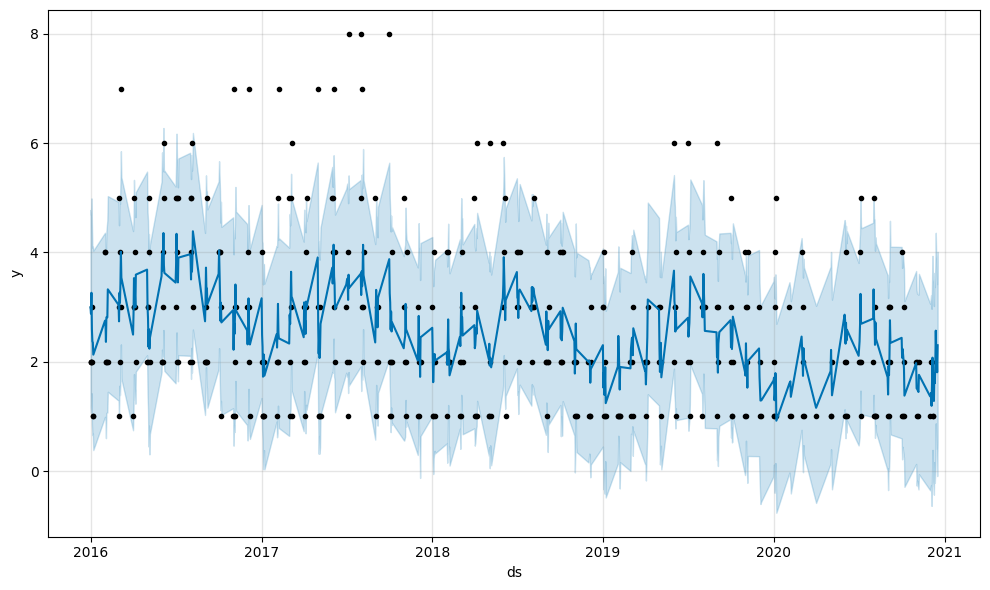

In [134]:
ts = df_provincia34[['ds', 'y']]
model = Prophet(
   yearly_seasonality=True,
   seasonality_mode=['additive','multiplicative'][0]
   ).add_country_holidays(country_name='ESP'
   ).fit(ts)

future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)
fig1 = model.plot(forecast)

c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing

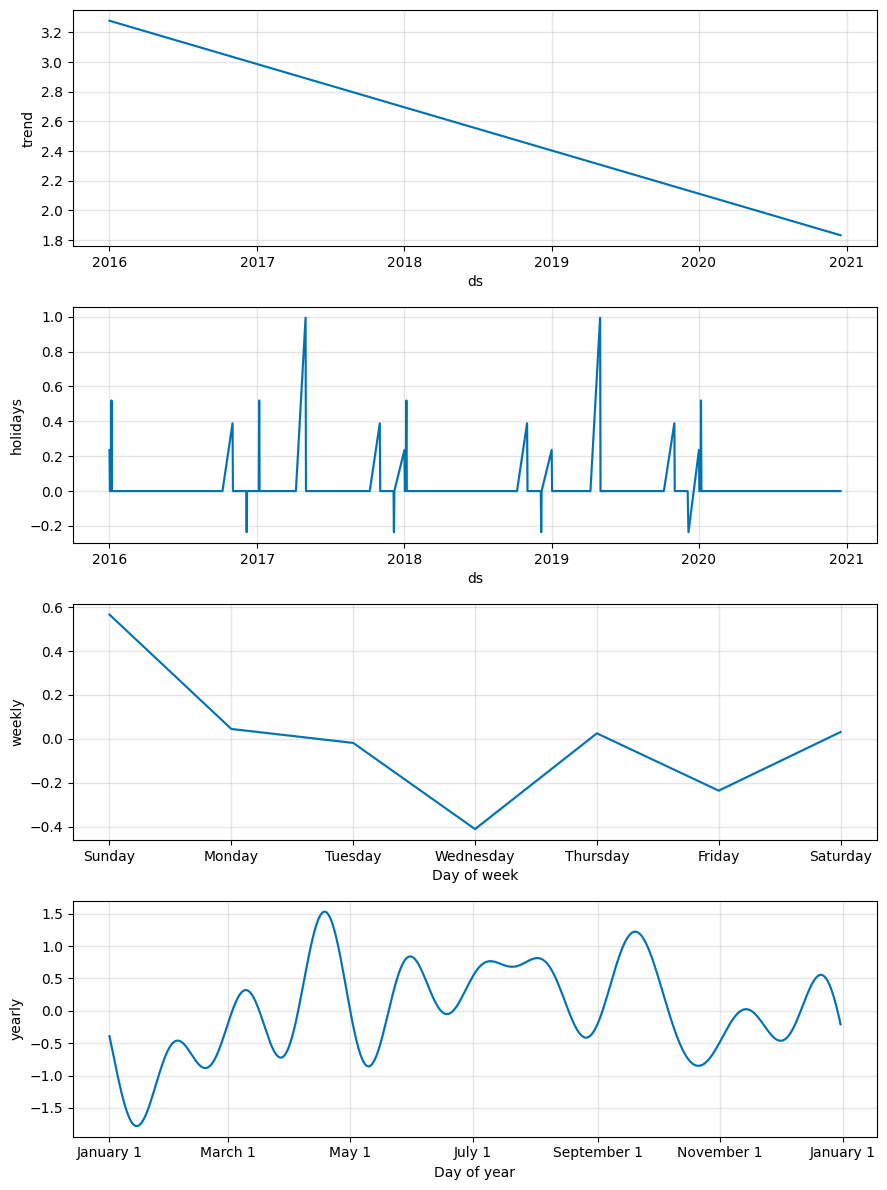

In [135]:
fig2 = model.plot_components(forecast)

In [136]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='336 days', period='84 days', horizon = '20 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/16 [00:00<?, ?it/s]20:57:35 - cmdstanpy - INFO - Chain [1] start processing
20:57:35 - cmdstanpy - INFO - Chain [1] done processing
  6%|▋         | 1/16 [00:00<00:06,  2.24it/s]20:57:36 - cmdstanpy - INFO - Chain [1] start processing
20:57:36 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 2/16 [00:00<00:03,  3.82it/s]20:57:36 - cmdstanpy - INFO - Chain [1] start processing
20:57:36 - cmdstanpy - INFO - Chain [1] done processing
 19%|█▉        | 3/16 [00:00<00:02,  4.96it/s]20:57:36 - cmdstanpy - INFO - Chain [1] start processing
20:57:36 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 4/16 [00:00<00:02,  5.73it/s]20:57:36 - cmdstanpy - INFO - Chain [1] start processing
20:57:36 - cmdstanpy - INFO - Chain [1] done processing
 31%|███▏      | 5/16 [00:00<00:01,  6.09it/s]20:57:36 - cmdstanpy - INFO - Chain [1] start processing
20:57:

In [137]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


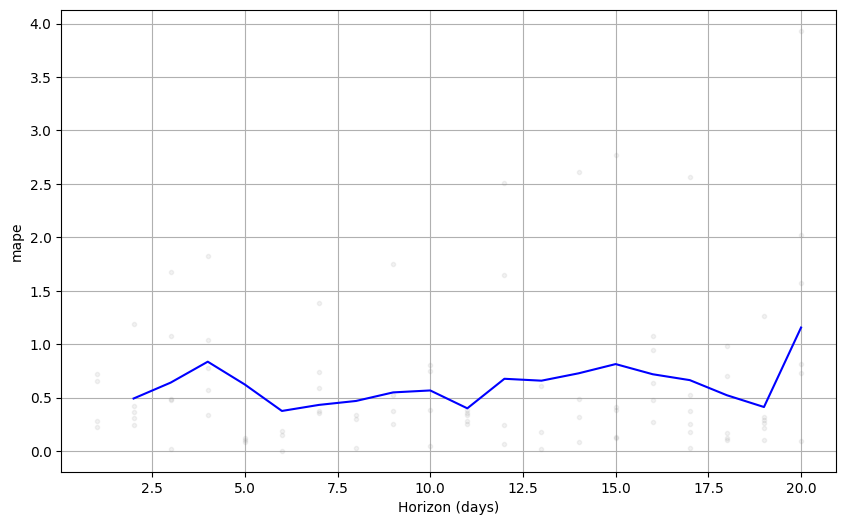

In [138]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape') # MAPE ES EL ERROR ABSOLUTO (+-) PORCENTUAL

In [139]:
df_provincia34.describe()

,ANYO_x,count,TOTAL_VICTIMAS_24H,y,ds
count,364.000000,364.000000,364.000000,364.000000,364
mean,2017.857143,2.631868,3.788462,2.631868,2018-04-29 07:34:56.703296768
min,2016.000000,1.000000,1.000000,1.000000,2016-01-01 00:00:00
25%,2017.000000,1.000000,2.000000,1.000000,2017-02-04 18:00:00
50%,2018.000000,2.000000,3.000000,2.000000,2018-04-01 12:00:00
75%,2019.000000,3.250000,5.000000,3.250000,2019-07-06 06:00:00
max,2020.000000,8.000000,14.000000,8.000000,2020-12-07 00:00:00
std,1.397135,1.545161,2.680771,1.545161,NaN


De acuerdo con los datos de validación de nuestro modelo de Prophet, se realiza una predicción anual donde hay periodos donde pueden ocurrir o 0 accidentes o el doble. En la gráfica están alrededor del 5º y 13º en adelante, que corresponden con viernes y sábado (es decir, le resulta dificil predecir la cantidad de accidentes por esas fechas).

### MODELO REDES NEURONALES

In [140]:
PASOS=84
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = df_provincia34['count'].values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-84),var1(t-83),var1(t-82),var1(t-81),var1(t-80),var1(t-79),var1(t-78),var1(t-77),var1(t-76),var1(t-75),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
84,-0.428571,-0.714286,-0.714286,-0.714286,-0.714286,-1.000000,-1.000000,-0.142857,-0.142857,-0.714286,...,-0.142857,-0.428571,-0.428571,-0.428571,-0.714286,-1.000000,-0.142857,-0.714286,-0.714286,-1.000000
85,-0.714286,-0.714286,-0.714286,-0.714286,-1.000000,-1.000000,-0.142857,-0.142857,-0.714286,-0.714286,...,-0.428571,-0.428571,-0.428571,-0.714286,-1.000000,-0.142857,-0.714286,-0.714286,-1.000000,-1.000000
86,-0.714286,-0.714286,-0.714286,-1.000000,-1.000000,-0.142857,-0.142857,-0.714286,-0.714286,-0.714286,...,-0.428571,-0.428571,-0.714286,-1.000000,-0.142857,-0.714286,-0.714286,-1.000000,-1.000000,-1.000000
87,-0.714286,-0.714286,-1.000000,-1.000000,-0.142857,-0.142857,-0.714286,-0.714286,-0.714286,-0.714286,...,-0.428571,-0.714286,-1.000000,-0.142857,-0.714286,-0.714286,-1.000000,-1.000000,-1.000000,-1.000000
88,-0.714286,-1.000000,-1.000000,-0.142857,-0.142857,-0.714286,-0.714286,-0.714286,-0.714286,0.714286,...,-0.714286,-1.000000,-0.142857,-0.714286,-0.714286,-1.000000,-1.000000,-1.000000,-1.000000,0.714286


In [141]:
values = reframed.values
n_train_days = 250
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split isnto input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(250, 1, 84) (250,) (30, 1, 84) (30,)


In [142]:
len(values)

280

In [143]:
def crear_modeloFF():
    model = Sequential()
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mse',optimizer='Adam',metrics=["mae"])
    model.summary()
    return model

In [144]:
EPOCHS=20

model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1, 84)          │         7,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,225 (28.22 KB)

 Trainable params: 7,225 (28.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.2687 - mae: 0.3951 - val_loss: 0.0859 - val_mae: 0.2280
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2334 - mae: 0.3630 - val_loss: 0.1003 - val_mae: 0.2606
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.2174 - mae: 0.3649 - val_loss: 0.0936 - val_mae: 0.2515
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1958 - mae: 0.3357 - val_loss: 0.0822 - val_mae: 0.2255
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1710 - mae: 0.3036 - val_loss: 0.0841 - val_mae: 0.2337
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1790 - mae: 0.3171 - val_loss: 0.1344 - val_mae: 0.2943
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1568 - mae: 0.3093 - val_loss: 0.1240 - val_mae: 0.2830
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1536 - mae: 0.3003 - val_loss: 0.1027 - val_mae: 0.2613
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1364 - mae: 0.2782 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


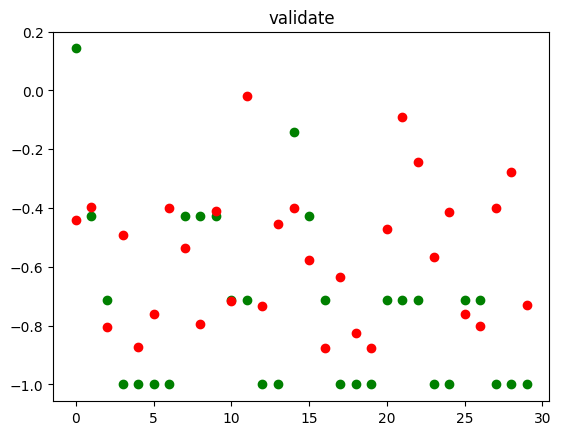

In [145]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

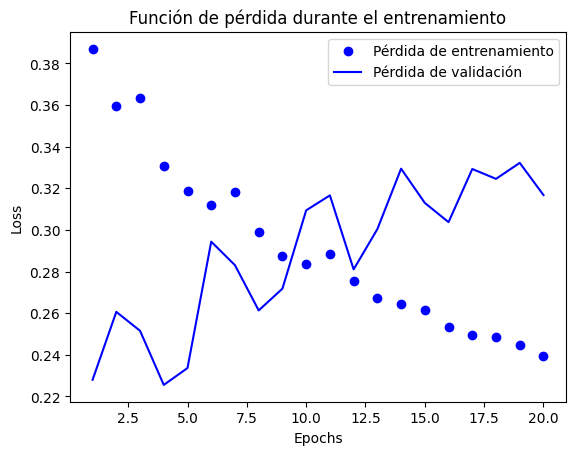

In [146]:
loss = history.history['mae']
val_loss = history.history['val_mae']

# Graficar la función de pérdida durante el entrenamiento
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Función de pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [147]:
resultados_viajes = scaler.inverse_transform(results)
resultados_viajes

array([[2.956287 ],
       [3.1072364],
       [1.681718 ],
       [2.77771  ],
       [1.4478576],
       [1.8350152],
       [3.10315  ],
       [2.621087 ],
       [1.7182304],
       [3.0646858],
       [1.9927295],
       [4.4303703],
       [1.9367286],
       [2.9109435],
       [3.105625 ],
       [2.4812922],
       [1.4287958],
       [2.2852337],
       [1.6152382],
       [1.4382379],
       [2.848875 ],
       [4.1797023],
       [3.6528964],
       [2.5169804],
       [3.0476334],
       [1.83533  ],
       [1.694946 ],
       [3.0997334],
       [3.5236912],
       [1.9504814]], dtype=float32)

Si bien el modelo de redes neuronales hace una buena predicción, para el número de accidentes en cada día de la semana para los meses en un año, el modelo no tiene la mejor curva de aprendizaje, por lo que los resultados son poco confiables. Por otro lado, Prophet, es el que tiene un mejor rendimiento, aunque hay que tener cuidado en los meses de abril y diciembre, donde los resultados no son tan confiables. Por tanto nos quedaremos con el modelo de Prophet para futuras predicciones.

# PREDICCIÓN PARA EL NÚMERO DE VICTIMAS

### MODELO PROPHET

CAMBIAR COUNT POR TOTAL_VICTIMAS_24H

In [148]:
df_provincia34['y'] = df_provincia34['TOTAL_VICTIMAS_24H']
df_provincia34['ds'] = pd.to_datetime(pd.to_datetime(df_provincia34['FECHA']).dt.date)

20:57:41 - cmdstanpy - INFO - Chain [1] start processing
20:57:41 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


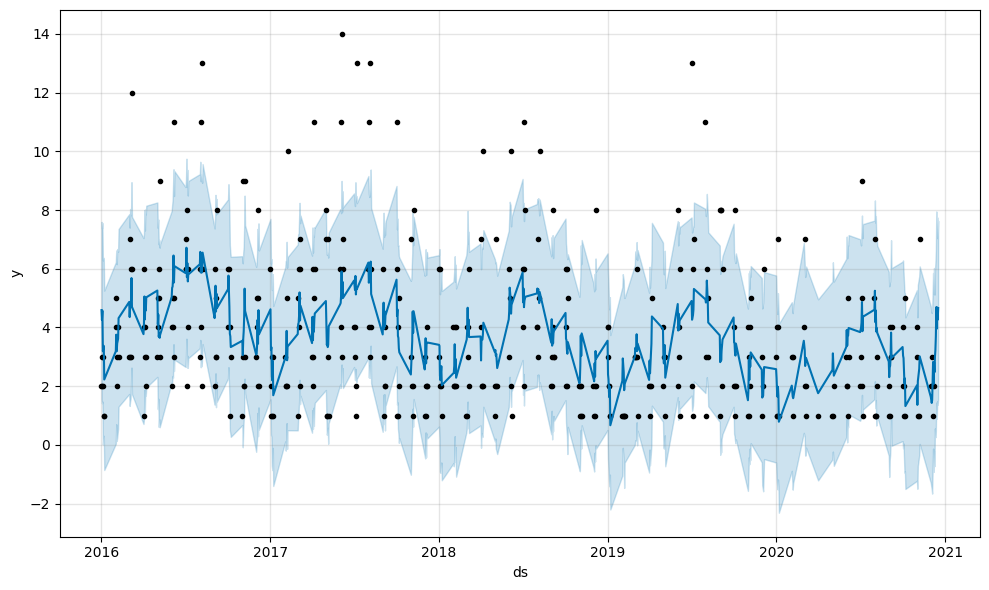

In [149]:
ts = df_provincia34[['ds', 'y']]
model = Prophet(
   yearly_seasonality=True,
   seasonality_mode=['additive','multiplicative'][0]
   ).add_country_holidays(country_name='ESP'
   ).fit(ts)

future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)
fig1 = model.plot(forecast)

c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing

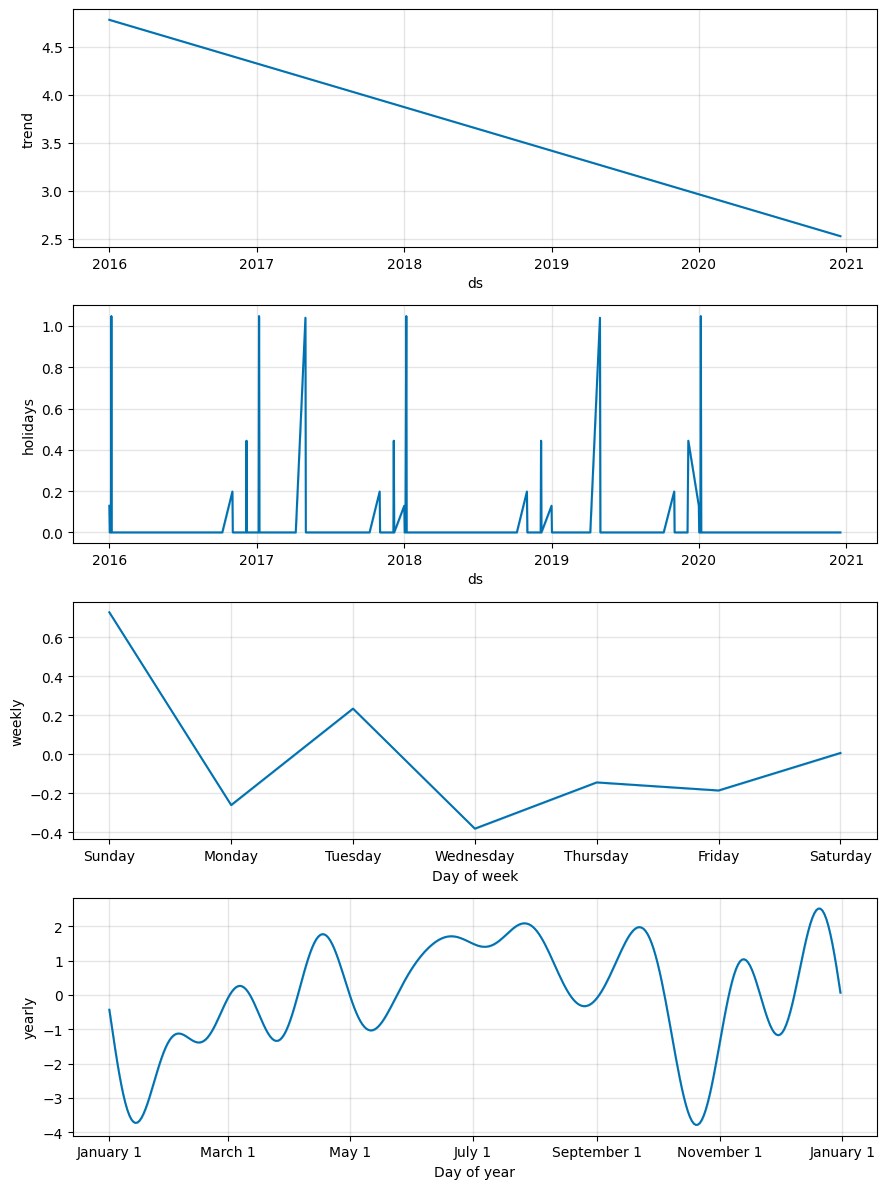

In [150]:
fig2 = model.plot_components(forecast)

In [151]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='336 days', period='84 days', horizon = '20 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/16 [00:00<?, ?it/s]20:57:42 - cmdstanpy - INFO - Chain [1] start processing
20:57:42 - cmdstanpy - INFO - Chain [1] done processing
  6%|▋         | 1/16 [00:00<00:03,  3.87it/s]20:57:42 - cmdstanpy - INFO - Chain [1] start processing
20:57:42 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 2/16 [00:00<00:04,  2.83it/s]20:57:42 - cmdstanpy - INFO - Chain [1] start processing
20:57:42 - cmdstanpy - INFO - Chain [1] done processing
 19%|█▉        | 3/16 [00:00<00:03,  3.64it/s]20:57:42 - cmdstanpy - INFO - Chain [1] start processing
20:57:42 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 4/16 [00:01<00:02,  4.36it/s]20:57:43 - cmdstanpy - INFO - Chain [1] start processing
20:57:43 - cmdstanpy - INFO - Chain [1] done processing
 31%|███▏      | 5/16 [00:01<00:02,  4.94it/s]20:57:43 - cmdstanpy - INFO - Chain [1] start processing
20:57:

In [152]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


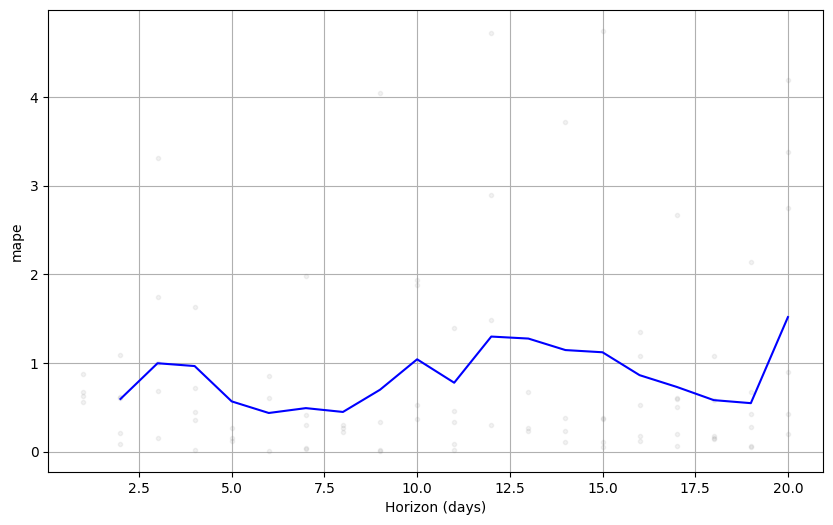

In [153]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape') # MAPE ES EL ERROR ABSOLUTO (+-) PORCENTUAL

In [154]:
df_provincia34.describe()

,ANYO_x,count,TOTAL_VICTIMAS_24H,y,ds
count,364.000000,364.000000,364.000000,364.000000,364
mean,2017.857143,2.631868,3.788462,3.788462,2018-04-29 07:34:56.703296768
min,2016.000000,1.000000,1.000000,1.000000,2016-01-01 00:00:00
25%,2017.000000,1.000000,2.000000,2.000000,2017-02-04 18:00:00
50%,2018.000000,2.000000,3.000000,3.000000,2018-04-01 12:00:00
75%,2019.000000,3.250000,5.000000,5.000000,2019-07-06 06:00:00
max,2020.000000,8.000000,14.000000,14.000000,2020-12-07 00:00:00
std,1.397135,1.545161,2.680771,2.680771,NaN


### MODELO REDES NEURONALES

In [155]:
PASOS=84
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = df_provincia34['TOTAL_VICTIMAS_24H'].values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-84),var1(t-83),var1(t-82),var1(t-81),var1(t-80),var1(t-79),var1(t-78),var1(t-77),var1(t-76),var1(t-75),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
84,-0.692308,-0.846154,-0.846154,-0.692308,-0.846154,-1.000000,-1.000000,-0.538462,-0.384615,-0.846154,...,-0.384615,-0.692308,-0.538462,-0.384615,-0.846154,-0.846154,-0.230769,-0.846154,-0.692308,-1.000000
85,-0.846154,-0.846154,-0.692308,-0.846154,-1.000000,-1.000000,-0.538462,-0.384615,-0.846154,-0.692308,...,-0.692308,-0.538462,-0.384615,-0.846154,-0.846154,-0.230769,-0.846154,-0.692308,-1.000000,-0.692308
86,-0.846154,-0.692308,-0.846154,-1.000000,-1.000000,-0.538462,-0.384615,-0.846154,-0.692308,-0.538462,...,-0.538462,-0.384615,-0.846154,-0.846154,-0.230769,-0.846154,-0.692308,-1.000000,-0.692308,-1.000000
87,-0.692308,-0.846154,-1.000000,-1.000000,-0.538462,-0.384615,-0.846154,-0.692308,-0.538462,-0.692308,...,-0.384615,-0.846154,-0.846154,-0.230769,-0.846154,-0.692308,-1.000000,-0.692308,-1.000000,-1.000000
88,-0.846154,-1.000000,-1.000000,-0.538462,-0.384615,-0.846154,-0.692308,-0.538462,-0.692308,0.692308,...,-0.846154,-0.846154,-0.230769,-0.846154,-0.692308,-1.000000,-0.692308,-1.000000,-1.000000,0.384615


In [156]:
values = reframed.values
n_train_days = 250
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split isnto input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(250, 1, 84) (250,) (30, 1, 84) (30,)


In [157]:
len(values)

280

In [158]:
def crear_modeloFF():
    model = Sequential()
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mse',optimizer='Adam',metrics=["mae"])
    model.summary()
    return model

In [159]:
EPOCHS=20

model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1, 84)          │         7,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,225 (28.22 KB)

 Trainable params: 7,225 (28.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.7750 - mae: 0.7565 - val_loss: 0.1192 - val_mae: 0.2769
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2286 - mae: 0.3414 - val_loss: 0.1068 - val_mae: 0.2398
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2824 - mae: 0.3728 - val_loss: 0.1191 - val_mae: 0.2462
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3002 - mae: 0.3768 - val_loss: 0.1232 - val_mae: 0.2478
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3428 - mae: 0.4043 - val_loss: 0.1245 - val_mae: 0.2482
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3310 - mae: 0.3991 - val_loss: 0.1245 - val_mae: 0.2481
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3117 - mae: 0.3844 - val_loss: 0.1236 - val_mae: 0.2475
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3413 - mae: 0.4099 - val_loss: 0.1216 - val_mae: 0.2463
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2770 - mae: 0.3637 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


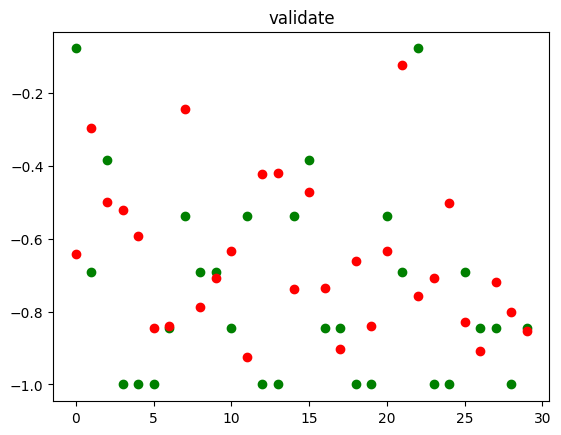

In [160]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

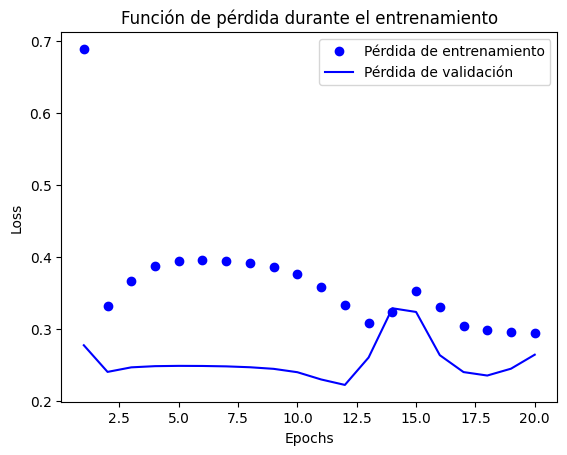

In [161]:
loss = history.history['mae']
val_loss = history.history['val_mae']

# Graficar la función de pérdida durante el entrenamiento
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Función de pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [162]:
resultados_viajes = scaler.inverse_transform(results)
resultados_viajes

array([[3.3349504],
       [5.574591 ],
       [4.2604246],
       [4.1119614],
       [3.6501493],
       [2.010454 ],
       [2.0372667],
       [5.9144363],
       [2.3892252],
       [2.8927839],
       [3.3886375],
       [1.4909166],
       [4.7497725],
       [4.778316 ],
       [2.7012148],
       [4.436025 ],
       [2.73022  ],
       [1.6299955],
       [3.2137237],
       [2.0455322],
       [3.3786426],
       [6.7134047],
       [2.586406 ],
       [2.8968828],
       [4.24334  ],
       [2.1209338],
       [1.5913442],
       [2.8378854],
       [2.2984085],
       [1.9493185]], dtype=float32)